In [1]:
#Install and load spacy
!pip install spacy

In [2]:
# Download the en_core_web_sm Model
#This Downloads the English (en_core_web_sm) model, which contains NLP features
#Like Tokenization, POS tagging, and named entity recognition


!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 85.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Load the NLP Model
#spacy.load("en_core_web_sm") loads the pre-trained small model into
#memory for processing text
import spacy
#Load the small English NLP Model
nlp = spacy.load("en_core_web_sm")

In [22]:
from google.colab import files
#upload multiple files manually
uploaded_files = files.upload()

Saving SENTIMENT ANALYSIS PDF.txt to SENTIMENT ANALYSIS PDF.txt


In [27]:
import glob
#we use glob.glob() to retrieve all files matching a specific patterns

#Get a list of all text files in the folder

text_files = glob.glob("SENTIMENT ANALYSIS PDF.txt")
texts = []
for file_path in text_files:
  with open(file_path, "r",encoding='utf-8') as file:
    texts.append(file.read())

print(f"Loaded {len(texts)} documents")

Loaded 1 documents


Step:1 convert the  paragraph into token

In [28]:
bfor i in texts:
  doc = nlp(i) #Process each Text
  print("Tokens for:",i)
  for token in doc:
    print(token)

Tokens for: ISN: 2394-3114

UGC Care Listed Journal

Studies in Indian Place Names

Vol-40-Issue 16-2020

IMPACT OF SOCIAL MEDIA ON RURAL PEOPLE -with
special reference to the village of KOONIMEDU
Ms Nisha M
Assisstant Professor
Department of Commerce
M.O.P Vaishnav College for Women (Autonomous)

ABSTRACT
The Social Media is no more enjoyed by the urban consumers alone, but, it is gradually
started to penetrate to the rural consumers as well. Social Media are websites and
applications that enable users to create and share content or to participate in social
networking such as Facebook, WhatsApp, Twitter etc. This paper focuses on studying the
impact of social media on rural people with special reference to Koonimdeu village,
Chennai, Tamil Nadu. The Information and Communication Technology is a prerequisite
to use Social media which is now developing in the rural area that helps them to gather
information and take decisions. Social media has affected all spheres of rural people’s
live

Step:2-Count the total no. of token

In [40]:
tokens_list = []  # Store tokens without printing

for i in texts:
    doc = nlp(i)  # Process each text
    tokens_list.extend([token.text for token in doc])  # Store tokens in a list

# Print total tokens count instead of actual tokens
print(f"Total tokens generated: {len(tokens_list)}")

Total tokens generated: 62895


Step:3-Count the total words after removing stopwords

In [41]:
# Process the text
tokens_list = []  # Store tokens without stopwords

for i in texts:
    doc = nlp(i)  # Process each text
    tokens_list.extend([token.text for token in doc if not token.is_stop])  # Remove stopwords

# Print the total number of tokens after removing stopwords
print(f"Total tokens after removing stopwords: {len(tokens_list)}")

Total tokens after removing stopwords: 42045


Step:4-After removin stopwords

In [43]:
lemmatized_tokens = []  # Store cleaned words

for i in texts:
    doc = nlp(i)  # Process each text
    lemmatized_tokens.extend([
        token.lemma_ for token in doc
        if not token.is_stop and token.is_alpha  # Remove stopwords & keep only words (no numbers/symbols)
    ])

# Print total cleaned tokens
print(f"Total cleaned tokens: {len(lemmatized_tokens)}")

# Print a sample of first 20 cleaned lemmatized words
print("Sample cleaned lemmatized words:", lemmatized_tokens[:20])

Total cleaned tokens: 26120
Sample cleaned lemmatized words: ['ISN', 'UGC', 'Care', 'Listed', 'Journal', 'Studies', 'Indian', 'Place', 'Names', 'issue', 'impact', 'social', 'MEDIA', 'RURAL', 'PEOPLE', 'special', 'reference', 'village', 'KOONIMEDU', 'Ms']


Step:5-POS Tagging

In [44]:
# Process the text using spaCy
doc = nlp(" ".join(lemmatized_tokens))

# Extract POS tagging
pos_tags = [(token.text, token.pos_) for token in doc]

# Print first 20 POS tags for checking
print("Sample POS Tags:", pos_tags[:20])


Sample POS Tags: [('ISN', 'PROPN'), ('UGC', 'PROPN'), ('Care', 'PROPN'), ('Listed', 'PROPN'), ('Journal', 'PROPN'), ('Studies', 'PROPN'), ('Indian', 'PROPN'), ('Place', 'PROPN'), ('Names', 'PROPN'), ('issue', 'NOUN'), ('impact', 'NOUN'), ('social', 'ADJ'), ('MEDIA', 'PROPN'), ('RURAL', 'PROPN'), ('PEOPLE', 'PROPN'), ('special', 'ADJ'), ('reference', 'NOUN'), ('village', 'NOUN'), ('KOONIMEDU', 'PROPN'), ('Ms', 'PROPN')]


Step:6- Named Entity Recognition (NER) is an NLP technique used to identify and classify named entities in text

In [45]:
# Extract Named Entities
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print first 20 named entities
print("Sample Named Entities:", entities[:20])

Sample Named Entities: [('ISN UGC Care Listed Journal Studies', 'ORG'), ('KOONIMEDU', 'ORG'), ('Media', 'NORP'), ('Facebook WhatsApp', 'PERSON'), ('Koonimdeu', 'PERSON'), ('Chennai Tamil Nadu Information Communication Technology', 'PERSON'), ('India', 'GPE'), ('Social Media Rural Consumers Rural Development', 'ORG'), ('India', 'GPE'), ('NGO', 'ORG'), ('ICT', 'ORG'), ('India', 'GPE'), ('India', 'GPE'), ('Social Network Services', 'ORG'), ('SNS', 'PRODUCT'), ('SNS', 'ORG'), ('NGO', 'ORG'), ('NGO', 'ORG'), ('Rai Shahila', 'PERSON'), ('India', 'GPE')]


Step:7-Use Libaries for sentiment analysis

In [46]:
# Install libraries (if not already installed)
!pip install textblob nltk wordcloud matplotlib seaborn

import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Download VADER sentiment analyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Steo:8 - TextBlob is a Python library used for text processing and mining, built on top of NLTK (Natural Language Toolkit) and Pattern. It provides an easy-to-use API for performing natural language processing (NLP) tasks, making text mining more efficient.

In [48]:
# Perform sentiment analysis using TextBlob
text_blob_analysis = TextBlob(" ".join(lemmatized_tokens))

# Get polarity and subjectivity
polarity = text_blob_analysis.sentiment.polarity
subjectivity = text_blob_analysis.sentiment.subjectivity

# Print results
print(f"TextBlob Polarity Score: {polarity}")  # -1 (negative) to +1 (positive)
print(f"TextBlob Subjectivity Score: {subjectivity}")  # 0 (objective) to 1 (subjective)

TextBlob Polarity Score: 0.06137400388560423
TextBlob Subjectivity Score: 0.32924217292546815


Step:9 - VADER is a rule-based sentiment analysis tool specifically designed for analyzing social media, short texts, and informal language

In [49]:
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
vader_sentiment = sia.polarity_scores(" ".join(lemmatized_tokens))

# Print results
print(f"VADER Sentiment Scores: {vader_sentiment}")


VADER Sentiment Scores: {'neg': 0.059, 'neu': 0.771, 'pos': 0.17, 'compound': 1.0}


Step:10 - sentiment score represent on graph

<ipython-input-50-61988cee2dd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()), palette="coolwarm")


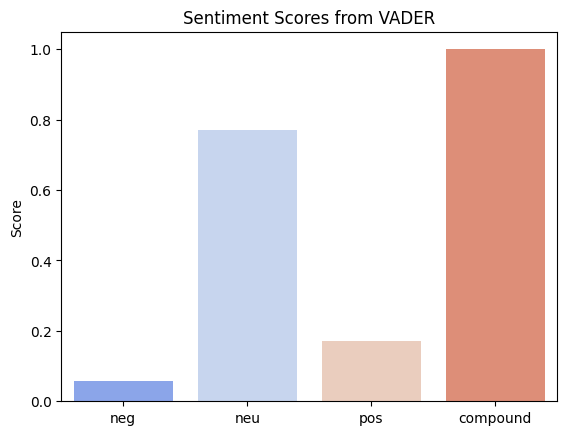

In [50]:
# Plot sentiment scores using Seaborn
sns.barplot(x=list(vader_sentiment.keys()), y=list(vader_sentiment.values()), palette="coolwarm")
plt.title("Sentiment Scores from VADER")
plt.ylabel("Score")
plt.show()


Step:11- word cloud of the corpus

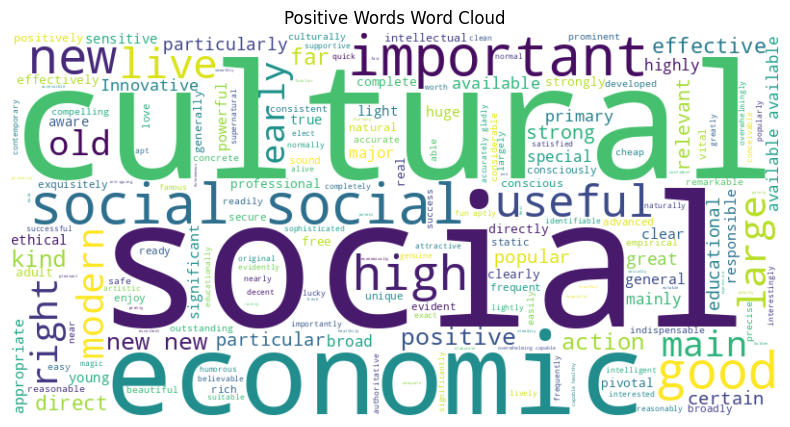

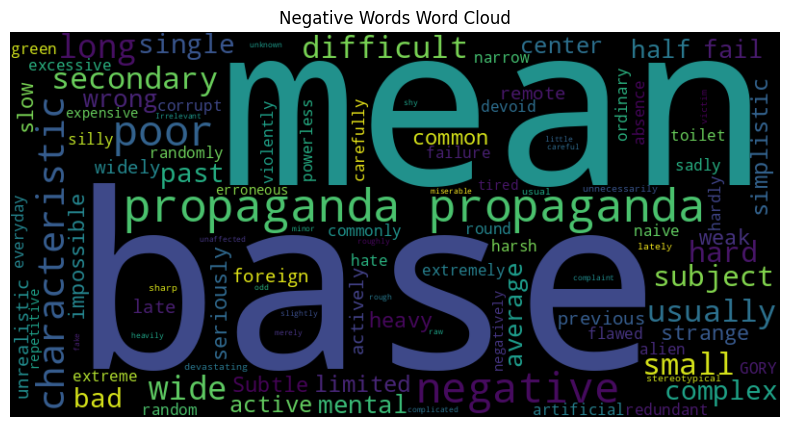

In [51]:
# Generate Word Cloud for positive words
positive_words = " ".join([word for word in lemmatized_tokens if TextBlob(word).sentiment.polarity > 0])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Words Word Cloud")b
plt.show()

# Generate Word Cloud for negative words
negative_words = " ".join([word for word in lemmatized_tokens if TextBlob(word).sentiment.polarity < 0])

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Words Word Cloud")
plt.show()

Step:12-now observing the word

In [63]:
from collections import Counter

# Count word frequencies
word_freq = Counter(lemmatized_tokens)

# Print the 10 most common words
print(word_freq.most_common(10))

[('rural', 638), ('development', 631), ('medium', 566), ('mass', 395), ('communication', 358), ('people', 260), ('information', 255), ('social', 193), ('message', 184), ('study', 173)]
